# Avacado Project

# Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.



# Importing required Libraries

In [1]:
import pandas as pd
import numpy as np

#for plotting and EDA
import matplotlib.pyplot as plt
import seaborn as sns

#for model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

#for spliting dataset into train and test
from sklearn.model_selection import train_test_split

#for model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')


# Importing dataset

In [2]:
ap=pd.read_csv(r'D:\DT EVAL Projects\avocado.csv')

In [3]:
ap.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
ap.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
ap.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

# Some relevant columns in the dataset are:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold

In [6]:
# checking dimension of dataset
ap.shape

(18249, 14)

We have 18249 rows with no null values and 14 column with target variable

In [7]:
#checking info
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
#checking data types
ap.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Here we observed 3 object types and 9 float type columns, 2 int type columns

# Checking and treating missing values

In [9]:
ap.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are zero null values in each column

Heat map is not required as there were no null values

In [10]:
#droping unnammed:0 and year which has no impact on avearage sales
ap.drop(['Unnamed: 0','year'],axis=1,inplace=True)

In [11]:
ap.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


In [12]:
# lets chnage date datatype to datetime series

ap['Date']=pd.to_datetime(ap['Date'])

In [13]:
ap['Year']=ap['Date'].dt.year
ap['Month']=ap['Date'].dt.month
ap['Day']=ap['Date'].dt.day

In [14]:
ap.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29


In [15]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  region        18249 non-null  object        
 12  Year          18249 non-null  int64         
 13  Month         18249 non-null  int64         
 14  Day           18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

After from above table , we can observe the following:
    
    We have 18249 rows and 13 column in our dataset
    we dont have any null values
    we have 3 types of datatype(dtype) in our dataset i.e int64, object,float64
    Day ,Month and Year dtype is int64,for type and region its object,rest are float 

In [16]:
ap['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

# Label Encoding the Object Varialbles

In [17]:
from sklearn.preprocessing import LabelEncoder

label= LabelEncoder()
ap['region']=label.fit_transform(ap.region)

In [18]:
#lets drop the date and type columns
ap.drop(['Date','type'], axis=1, inplace=True)

In [19]:
ap.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,26.495644,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,15.583788,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,13.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,26.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,40.000000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,53.000000,2018.000000,12.000000,31.000000


Observation from above tabe is :
    
    1- 18249 values count in each columns confirms that we dont have any missing values in our dataset
    2- Average max price is 111 and mix prce is 0
    3- Total Volume, total bag , 4046,4770,4225,small and large bags have highest standard deviation
    4- Total no of bags 18249 and min is 0
    5- Average sales in each reign is 986
    6- there are total 53 regions where avacoda is sold 

# Checking correlation

In [20]:
#lets check correlation

ap.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,-0.011716,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.174176,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.192073,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,0.145726,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,0.095252,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.175256,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.164702,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.198768,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.082281,0.081033,-0.012969,0.000319
region,-0.011716,0.174176,0.192073,0.145726,0.095252,0.175256,0.164702,0.198768,0.082281,1.000000,-0.000055,-0.000144,-0.000021


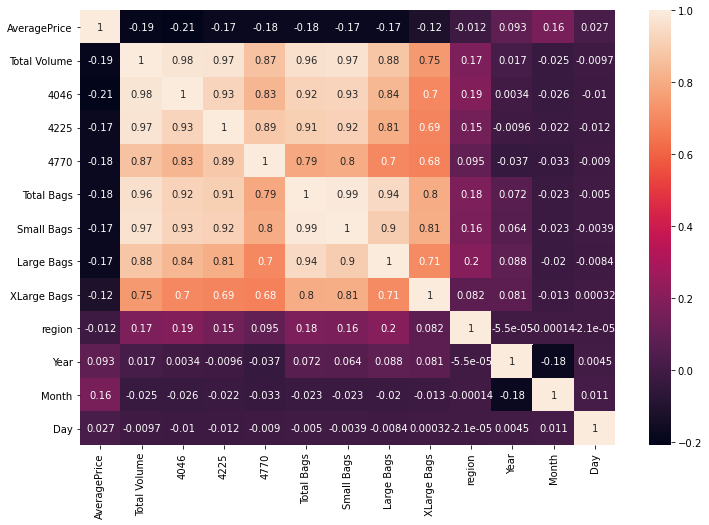

In [21]:
#heatmap for correlation

plt.figure(figsize=[12,8])
sns.heatmap(ap.corr(),annot=True)
plt.show()

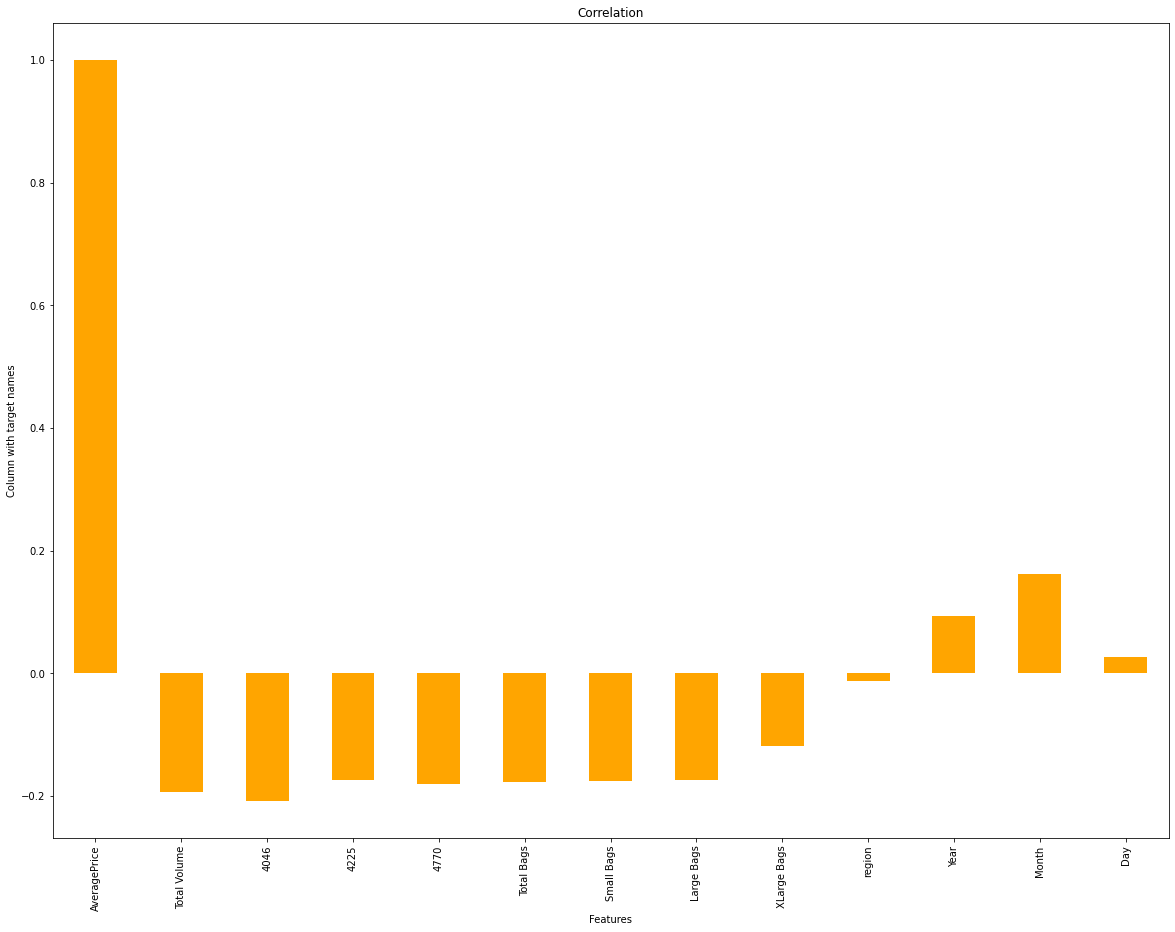

In [22]:
#barplot for correlation

plt.figure(figsize=(20,15))
ap.corr()['AveragePrice'].plot(kind='bar',color='orange')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

    1- Total volume,Small bags and total bags are highly correlated
    2- Average Price and large , Small bags are highly negative correlated
    3- Xlarge and region are negatives correlated
    4- All coumns are less correlated with average price

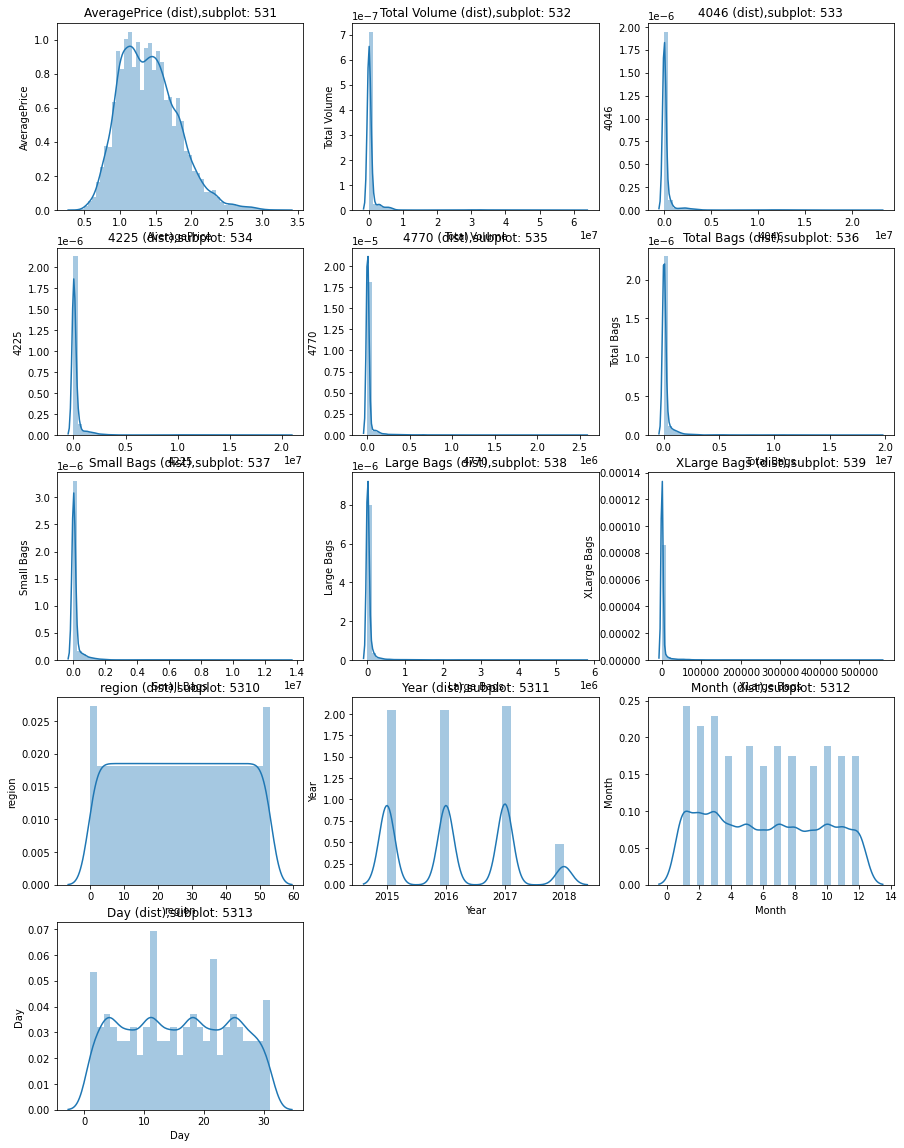

In [23]:
#distplot for each column
Columns=ap.columns

#plot numerical data
a= 5 # no of rows
b= 3 # no of columns
c= 1 # initialze plot counter

fig=plt.figure(figsize=(15,20))
for i in Columns:
    plt.subplot(a,b,c)
    plt.title('{} (dist),subplot: {}{}{}'.format(i,a,b,c))
    plt.ylabel(i)
    sns.distplot(ap[i])
    c= c+1
plt.show()

Here we observe that there is lot of skewness in each column

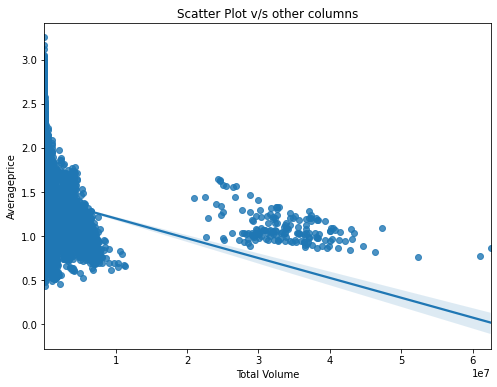

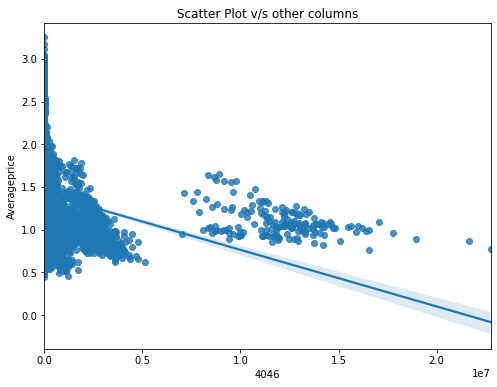

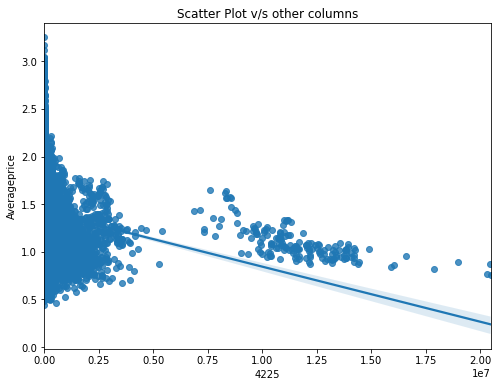

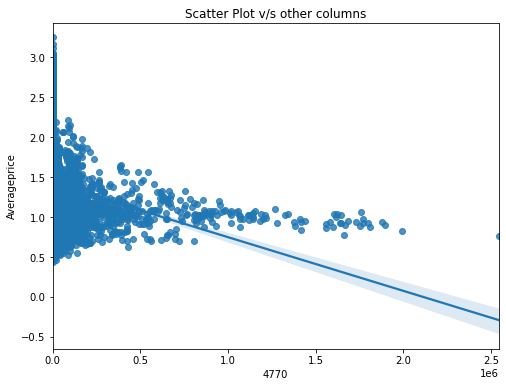

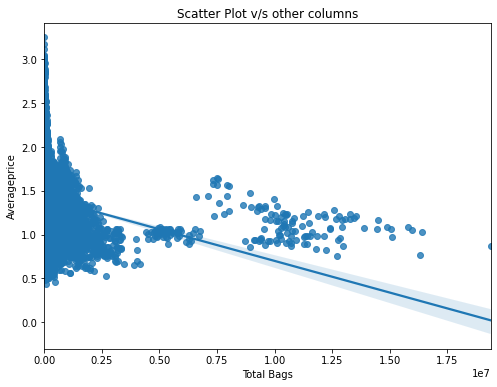

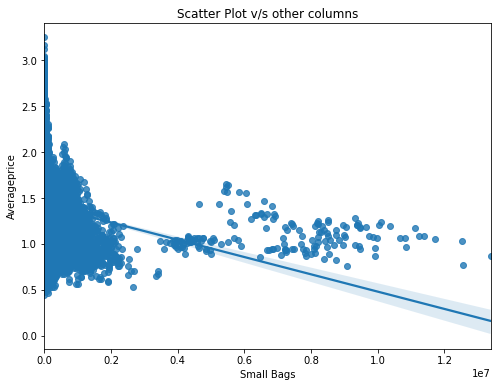

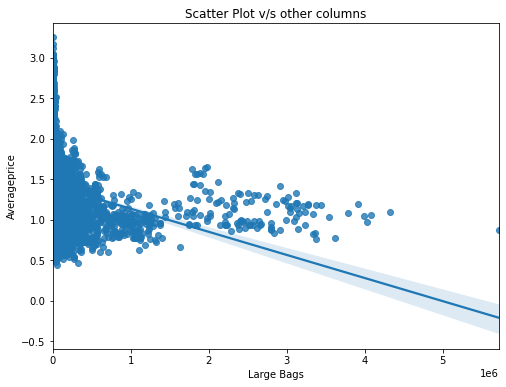

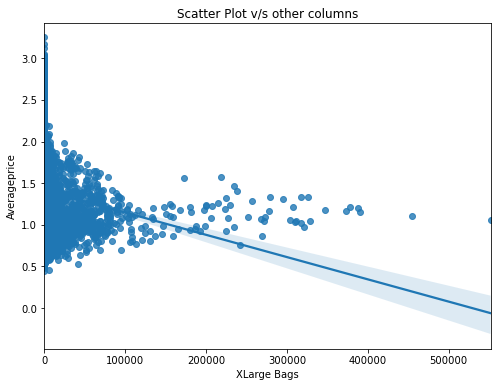

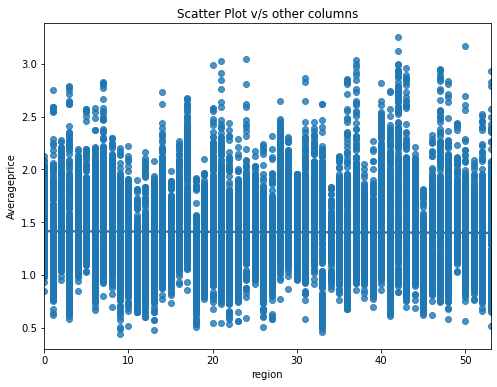

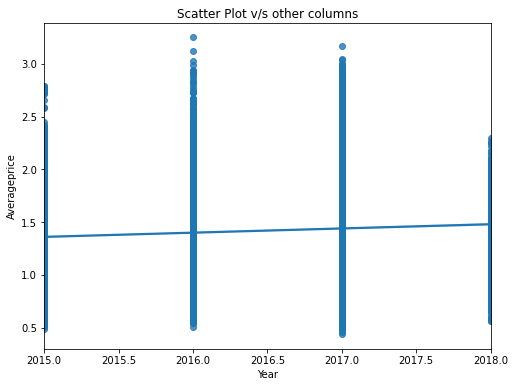

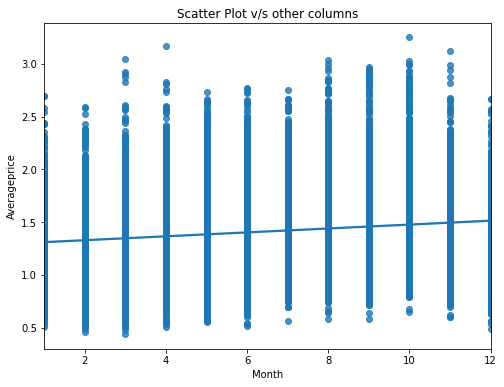

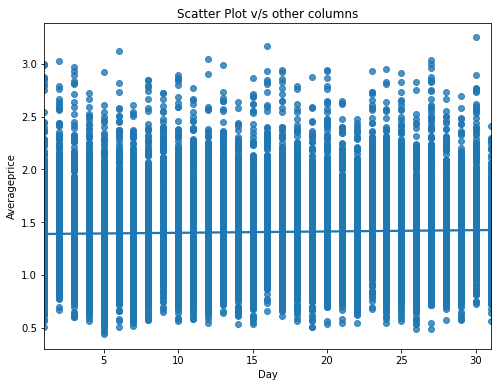

In [24]:
# Checking how w is varaited with all columns separately

for i in ap.columns[1:]:                                       #bivaraite analysis
    plt.figure(figsize=(8,6))
    sns.regplot(ap[i],ap['AveragePrice'])
    plt.title('Scatter Plot v/s other columns')
    plt.xlabel(i)
    plt.ylabel('Averageprice')
    plt.show()

     1 Due to this columns Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags there Averageprice decreases.
     2 In all regions the Averageprice is almost same.
     3 In year 2016 2017 the Averageprice is increases.
     4 In Days and Month Averageprice is almost same.

# Multi Variate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

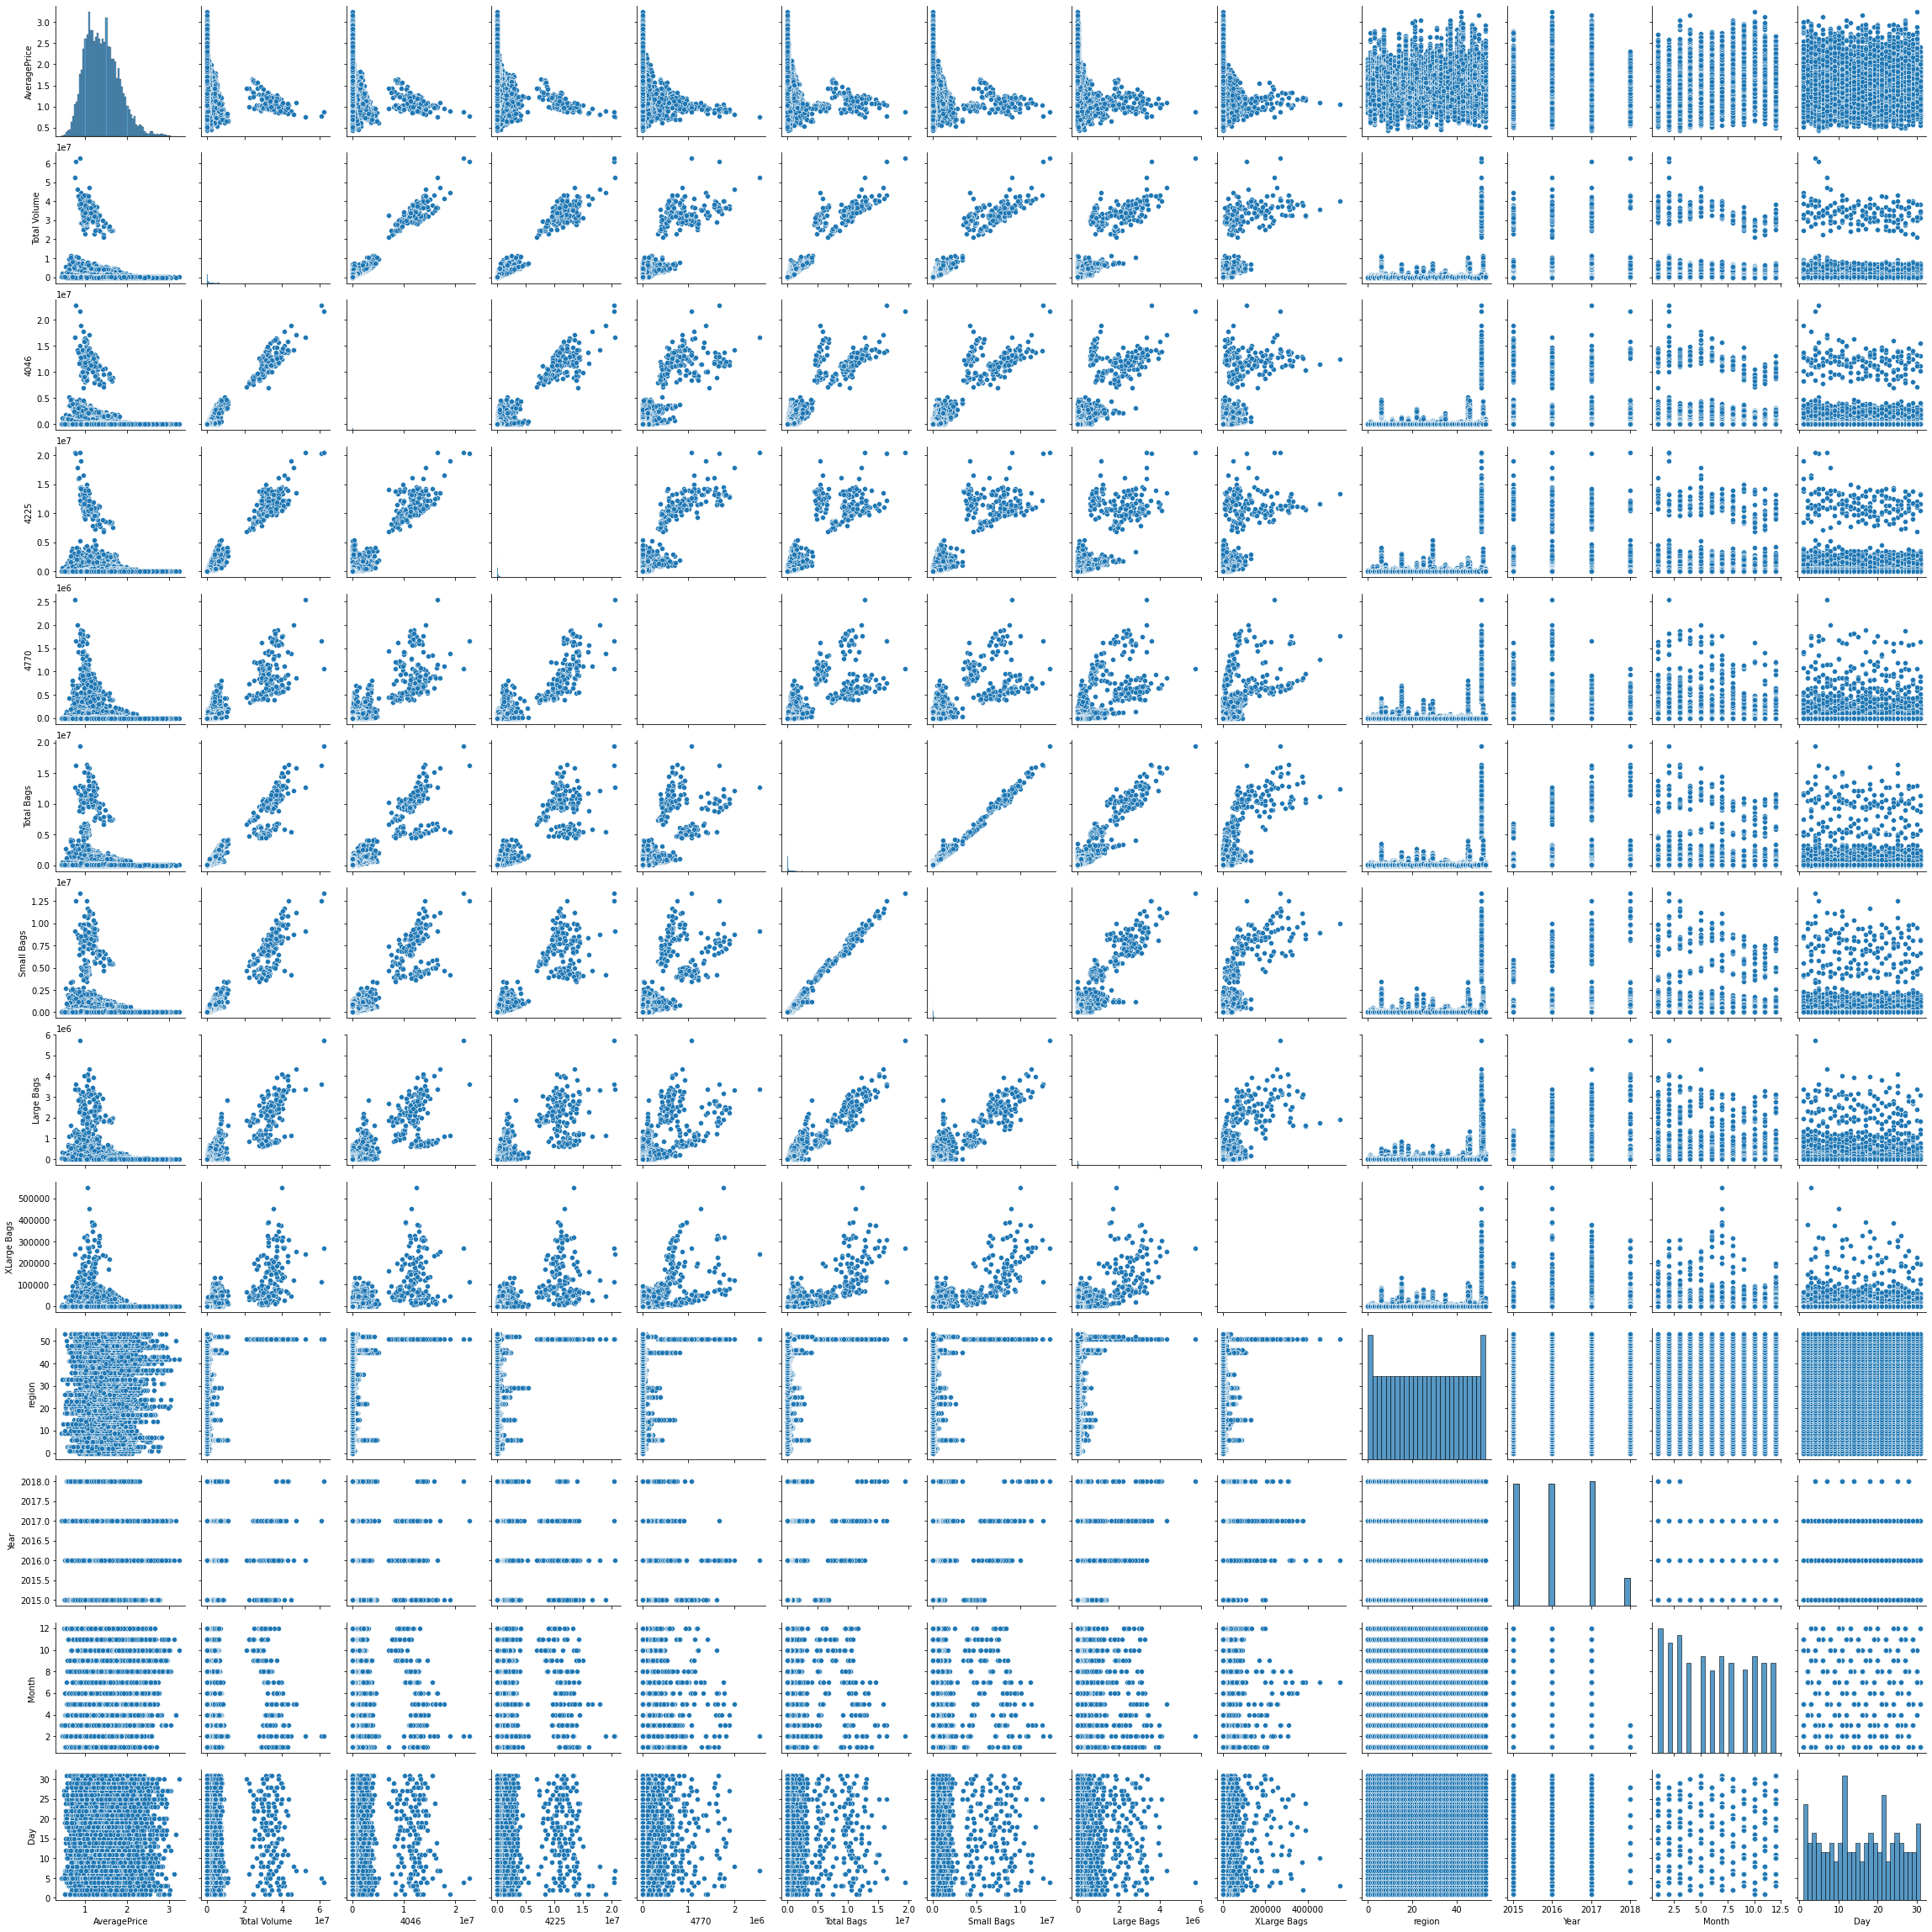

In [25]:
#Checking normal distribution of each column

sns.pairplot(ap)
plt.show

# Checking Outlier Using Boxplot



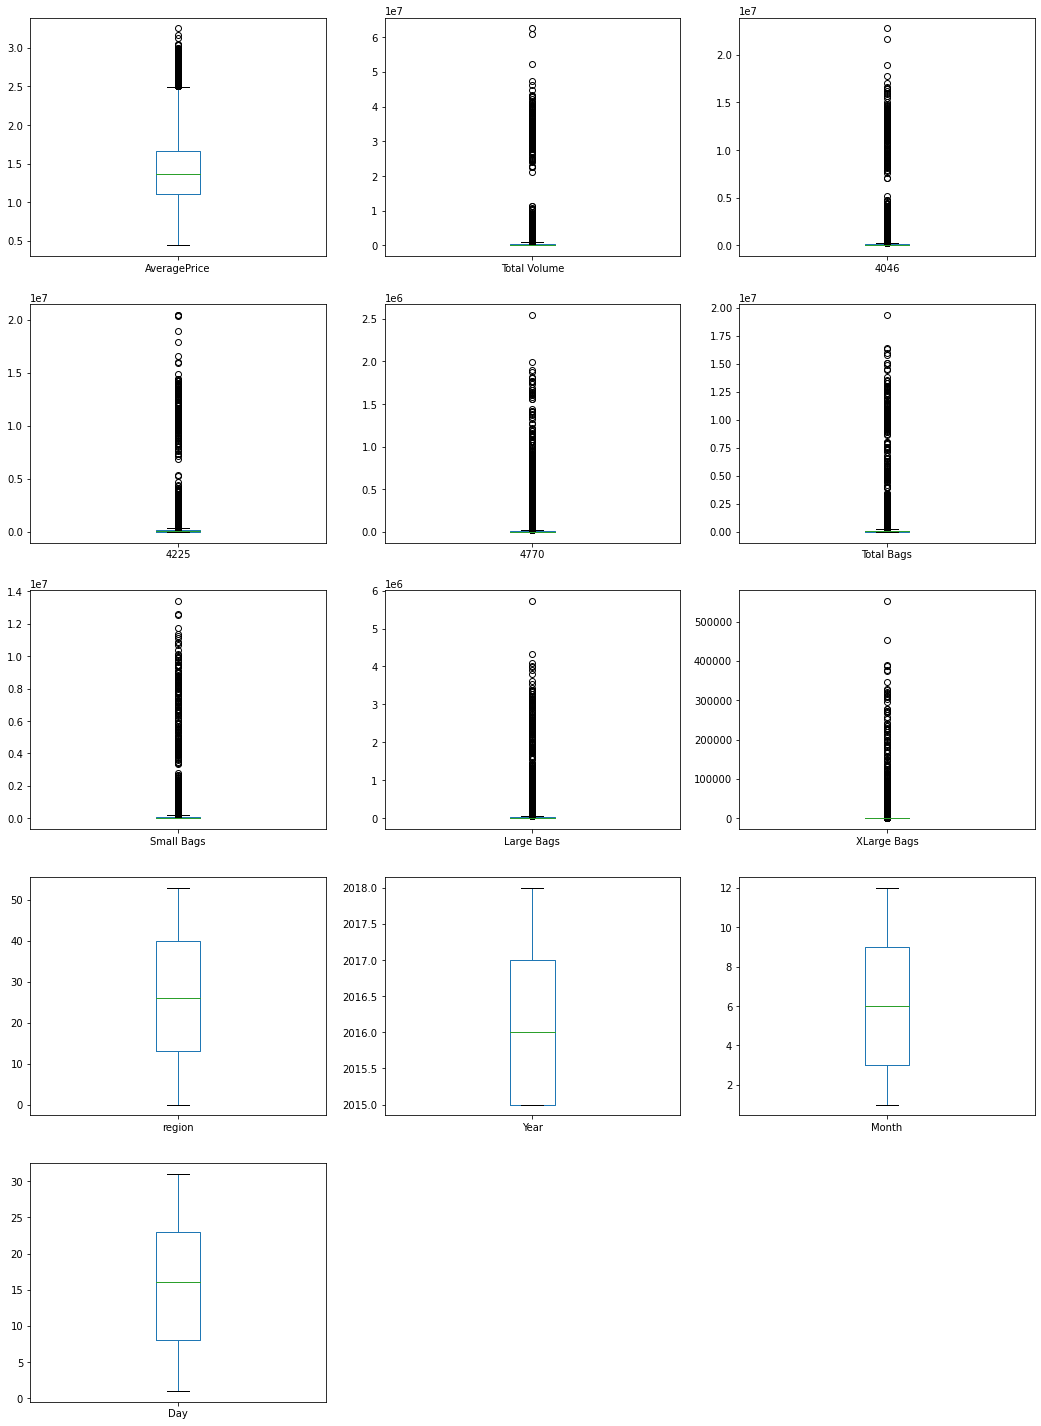

In [26]:
#plotting boxplot to check outlier in dataset

ap.plot(kind='box',subplots= True,layout=(7,3),figsize=(18,36))
plt.show()

There are outliers, lets remove it

# Removing outliers

In [27]:
# Z score techniue

from scipy.stats import zscore
z=np.abs(zscore(ap))

In [28]:
ap_new=ap[(z<3).all(axis=1)]
print(ap.shape)
print(ap_new.shape)

(18249, 13)
(17651, 13)


In [29]:
lossper=((18249-17651)/18249)*100
lossper

3.276891884486821

here we loss only 3.2% so we remove outliers.

# checking skewness

In [30]:
ap.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
region           0.000030
Year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

# Splitting Data in x(independent) and y(independent)

In [31]:
x=ap_new.drop('AveragePrice',axis=1)
y=ap_new['AveragePrice']

In [32]:
#rewmoving skewness
from sklearn.preprocessing import power_transform
#using yeo johnson method
x_new=power_transform(x,method='yeo-johnson')
x_new=pd.DataFrame(x_new, columns=x.columns)

In [33]:
x_new.skew()

Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
region         -0.257799
Year            0.227731
Month          -0.146554
Day            -0.208926
dtype: float64

skewness has been removed

In [34]:
#To normalise data

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=scaler.fit_transform(x_new)

In [35]:
#checking shape of X and y

print(x.shape)
print(y.shape)

(17651, 12)
(17651,)


# Checking Best Random state

In [36]:

r2score=0
RS=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30, random_state=i)
    dr=DecisionTreeRegressor()
    dr.fit(x_train, y_train)
    preddr=dr.predict(x_test)
    r2=r2_score(y_test,preddr)
    if r2>r2score:
        r2score=r2
        RS=i
print('R2 score obtained is ',r2score,'on Random State',RS)

R2 score obtained is  0.7558580000209405 on Random State 330


We have found best random state value as 330 , we will create out train test using random state(330)

# Creating Model

In [37]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.30, random_state=330)

In [38]:
models=[LinearRegression(),
       SVR(),
       DecisionTreeRegressor(),
       RandomForestRegressor(),
       KNeighborsRegressor(),
       ]

model_names=['LinearRegression',
       'SVR',
       'DecisionTreeRegressor',
       'RandomForestRegressor',
       'KNeighborsRegressor',
       ]

r2=[]
mae=[]
mse=[]
rmse=[]
df={}

for i in range(len(models)):
    mod=models[i]
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    mae.append(mean_absolute_error(y_test,pred))
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

    
df={'Model':model_names,'R2_score':r2,
  'mean_absolute_error':mae,
  'mean_squared_error':mse,
  'root_mean_squared_error':rmse}


accuracy=pd.DataFrame(df)
accuracy

,Model,R2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
0,LinearRegression,0.521649,0.215333,0.072166,0.268637
1,SVR,0.768998,0.140524,0.034850,0.186681
2,DecisionTreeRegressor,0.758738,0.126977,0.036398,0.190782
3,RandomForestRegressor,0.884072,0.094949,0.017489,0.132247
4,KNeighborsRegressor,0.786847,0.131585,0.032157,0.179324


Random Forest has best R2 Score, and less errors as compared to other models. We will now check Cross validation score 

# Checking Cross validation score

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cross=[]
kf=KFold(n_splits=5,random_state=200,shuffle=True)
for model in range(len(models)):
    scr=cross_val_score(models[model],x,y,cv=kf)
    cross.append(scr.mean())
diff={'Model':model_names,'R2_score':r2,'Cross val score':cross}
accuracy=pd.DataFrame(diff)
accuracy

,Model,R2_score,Cross val score
0,LinearRegression,0.521649,0.503888
1,SVR,0.768998,0.766886
2,DecisionTreeRegressor,0.758738,0.738606
3,RandomForestRegressor,0.884072,0.882863
4,KNeighborsRegressor,0.786847,0.792654


The difference of R2 score and cross val score for KNN is less, but random forest has less errors compared to other models, so we consider Random forest as our best model and perform hyper tunning now.

# Hyper tunning the model

In [40]:
from sklearn.model_selection import GridSearchCV

RFC_param={'bootstrap':[True,False],
          'max_depth':[10,20,30,40,None],
          'max_features':['auto','sqrt'],
          'min_samples_leaf':[1,2,4],
          'min_samples_split':[2,5,10],
          'n_estimators':[5,10,20,30,50],
          }

In [41]:
RFC=GridSearchCV(RandomForestRegressor(),RFC_param,cv=5) #tune the model

In [42]:
RFC.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 20, 30, 50]})

In [43]:
RFC.best_params_ #finding best paramenters for tune

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [44]:
Randomforest=RandomForestRegressor(bootstrap=False,max_depth=40,min_samples_leaf=1,min_samples_split=2,
                                   max_features='sqrt',n_estimators=50)
Randomforest.fit(x_train,y_train)
print("Score=",Randomforest.score(x_train,y_train))
predrandom=Randomforest.predict(x_test)

print('Mean Absolute Error=',mean_absolute_error(y_test,predrandom))
print('Mean squared Error=',mean_squared_error(y_test,predrandom))
print('Root Mean Absolute Error=',np.sqrt(mean_absolute_error(y_test,predrandom)))

print('\nR2 Score=',r2_score(y_test,predrandom))

Score= 1.0
Mean Absolute Error= 0.0899025679758308
Mean squared Error= 0.01565476359516616
Root Mean Absolute Error= 0.2998375693201751

R2 Score= 0.8962322711625846


After hyper tunning with gridsearchcv R2 score of random forest regressor has increased to 89

# Lets Plot Final Graph for actual and predicted output values

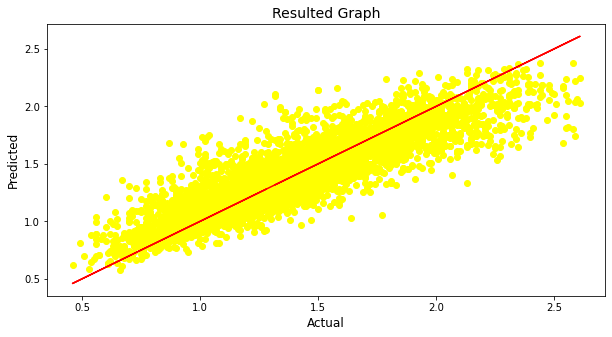

In [45]:
# Final output Graph

plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=pred,color='Yellow')
plt.plot(y_test,y_test,color='Red')
plt.xlabel('Actual',fontsize=12)
plt.ylabel('Predicted',fontsize=12)
plt.title('Resulted Graph',fontsize=14)
plt.show()

# Saving the model

In [46]:
import joblib

joblib.dump(Randomforest,'Avacado.pkl')

['Avacado.pkl']

# Conclusion

Loading the model

In [47]:
Randomforest=joblib.load('Avacado.pkl','r+')
Pretd=Randomforest.predict(x_test)
Pretd

array([1.2848, 0.9994, 2.098 , ..., 1.2274, 1.167 , 1.4812])

In [48]:
Finalrf=np.array(y_test)
Finalrf

array([1.28, 0.94, 2.13, ..., 1.3 , 1.29, 1.32])

In [49]:
predt=np.array(Randomforest.predict(x_test))
predt

array([1.2848, 0.9994, 2.098 , ..., 1.2274, 1.167 , 1.4812])

In [50]:
ap_pred=pd.DataFrame({'Original':Finalrf,'Predicted':predt},index=range(len(Finalrf)))
ap_pred

,Original,Predicted
0,1.28,1.2848
1,0.94,0.9994
2,2.13,2.0980
3,0.96,1.1926
4,1.42,1.5384
...,...,...
5291,1.12,1.0860
5292,1.33,1.2122
5293,1.30,1.2274
5294,1.29,1.1670


We have used Random Forest Regressor in the dataset and achive the accuracy score. It is also used for predicting the AveragePrice of Avacado


Reason to use Regressor is that the data was float, to use classifier model the data needs to integer type